<a href="https://colab.research.google.com/github/hei1sme/MAI391_project/blob/main/MAI391_SE194127_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAI391 FINAL PROJECT - MALL CUSTOMER SEGMENTATION


## Nhập Thư Viện

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

## Khám Phá Dữ Liệu

### Nhập Dataset

In [90]:
# Đọc dữ liệu từ dataset đã upload lên github
url = "https://raw.githubusercontent.com/hei1sme/MAI391_project/refs/heads/main/data/Mall_Customers.csv"
df = pd.read_csv(url)

# Kiểm tra số dòng và số cột
print(f"Dataset có {df.shape[0]} dòng và {df.shape[1]} cột")

# Xem 5 dòng đầu tiên
df.head()

Dataset có 200 dòng và 5 cột


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Kiểm Tra Thông Tin Dữ Liệu

In [91]:
print("\n Thông tin dữ liệu:")
df.info()

print("\n Số lượng giá trị thiếu trong từng cột:")
print(df.isnull().sum())


 Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

 Số lượng giá trị thiếu trong từng cột:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [92]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


from matplotlib import pyplot as plt
_df_20['CustomerID'].plot(kind='hist', bins=20, title='CustomerID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22['Annual Income (k$)'].plot(kind='hist', bins=20, title='Annual Income (k$)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23['Spending Score (1-100)'].plot(kind='hist', bins=20, title='Spending Score (1-100)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24.plot(kind='scatter', x='CustomerID', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25.plot(kind='scatter', x='Age', y='Annual Income (k$)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26.plot(kind='scatter', x='Annual Income (k$)', y='Spending Score (1-100)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27['CustomerID'].plot(kind='line', figsize=(8, 4), title='CustomerID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_28['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_29['Annual Income (k$)'].plot(kind='line', figsize=(8, 4), title='Annual Income (k$)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_30['Spending Score (1-100)'].plot(kind='line', figsize=(8, 4), title='Spending Score (1-100)')
plt.gca().spines[['top', 'right']].set_visible(False)

### Kiểm tra phân phối dữ liệu

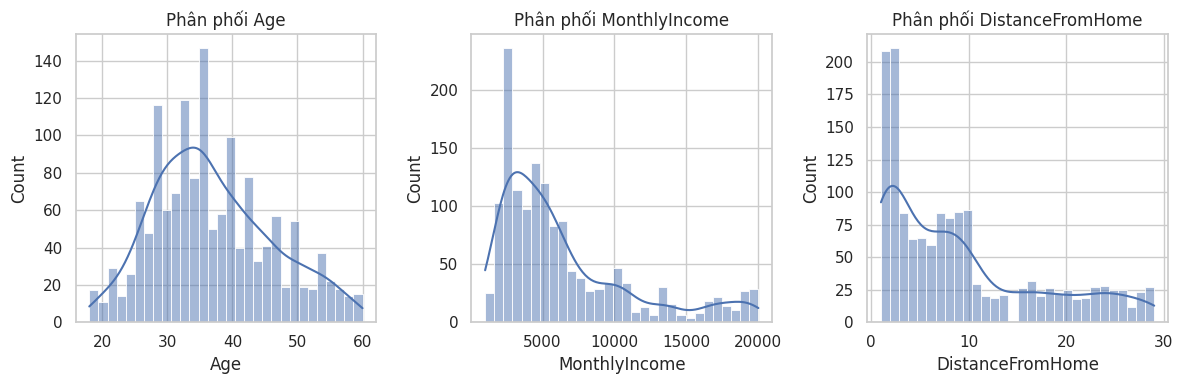

In [75]:
num_cols = ["Age", "MonthlyIncome", "DistanceFromHome"]

plt.figure(figsize=(12, 4))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Phân phối {col}")

plt.tight_layout()
plt.show()

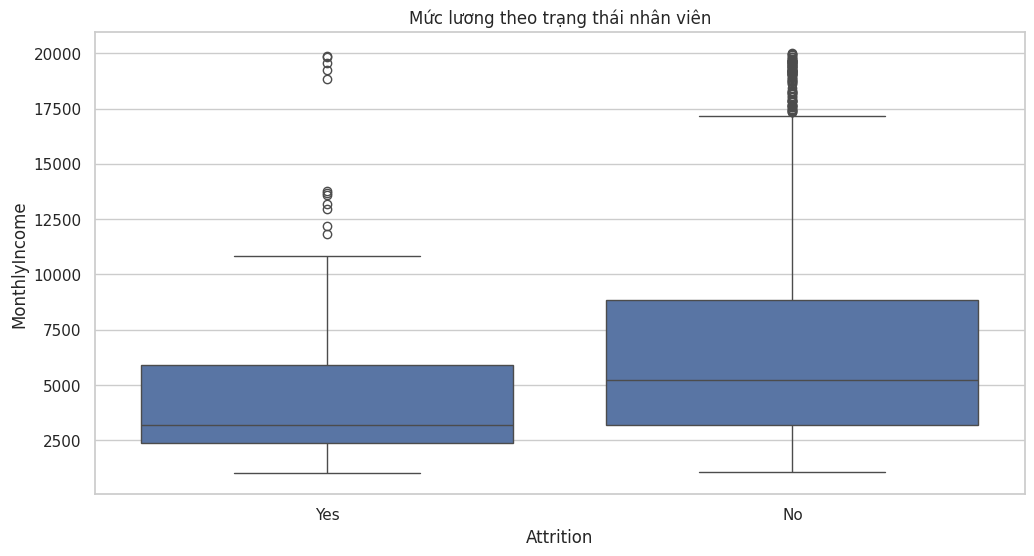

In [76]:
plt.figure(figsize=(12, 6))

# Vẽ biểu đồ hộp cho mức lương theo trạng thái nhân viên
sns.boxplot(x=df["Attrition"], y=df["MonthlyIncome"])
plt.title("Mức lương theo trạng thái nhân viên")
plt.show()

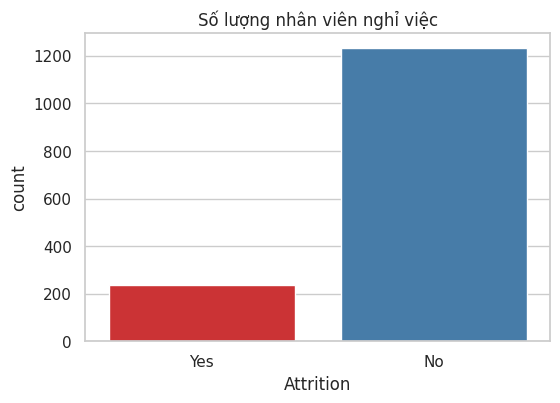

In [77]:
# Vẽ biểu đồ số lượng nhân viên nghỉ việc (Attrition)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Attrition", palette="Set1")
plt.title("Số lượng nhân viên nghỉ việc")
plt.show()

## Tiền Xử Lý Dữ Liệu

### Loại bỏ cột không cần thiết

In [78]:
# Loại bỏ các cột không cần thiết
df = df.drop(columns=['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'])


### Mã hóa dự liệu dạng phân loại

In [82]:
# Mã hóa cột Attrition (biến mục tiêu)
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Danh sách các cột dạng phân loại cần mã hóa
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender',
                    'JobRole', 'MaritalStatus', 'OverTime']

# Áp dụng Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Lưu lại encoder để sử dụng sau (nếu cần)

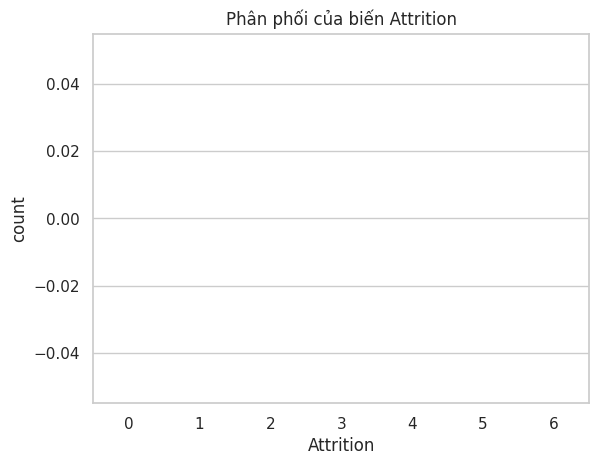

,count
Attrition,


In [88]:
# Kiểm tra phân bố dữ liệu của biến Attrition
sns.countplot(x=df['Attrition'])
plt.title('Phân phối của biến Attrition')
plt.show()

# In số lượng từng loại
df['Attrition'].value_counts()

In [87]:
print(df['Attrition'].unique())  # Kiểm tra các giá trị có trong cột Attrition
print(df['Attrition'].value_counts())  # Kiểm tra số lượng từng loại


[nan]
Series([], Name: count, dtype: int64)


In [86]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
